In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib as mpl
from projet_6_bis_iteration_friendly import *

In [3]:

# --- Paramètres du domaine et numérique ---
nx, ny = 51, 51
Lx, Ly = 1.0, 1.0
dt = 1e-3  # à ajuster si ça diverge à grand Re/Ra

dx = Lx/(nx-1)
dy = Ly/(ny-1)

# --- Grilles de paramètres ---
nu = 1.57e-5
Re_list = [100]              # -> plusieurs Re
Ra_list = np.arange(6,7)*1e5                # -> plusieurs Ra
Pr = 0.71

res_dict = {}


for i, Re in enumerate(Re_list):
    res_dict[Re] = {}
    for j, Ra in enumerate(Ra_list):
        U0, res_dict[Re][Ra]= global_resolution(nx, ny, Lx, Ly, dt, nu, Re, Ra)
        res_dict[Re][Ra]['U0'] = U0
        res_dict[Re][Ra]['Nu'] = get_average_nusselt(res_dict[Re][Ra]['T'][-1], dx)
        res_dict[Re][Ra]['Pe'] = get_peclet_list(res_dict[Re][Ra]['u'], res_dict[Re][Ra]['v'], dx, dy, 1/(Re*Pr))
        print(f"U0={U0:.3g} | Re={Re:.3e} | Ra={Ra:.1e} -> Nu={res_dict[Re][Ra]['Nu']:.4f}")


c:\Users\Thomas Brionne\Desktop\Thermal-transfert\projet_6_bis_iteration_friendly.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  res_w.append(np.linalg.norm(w_new - w)/np.linalg.norm(w))


Itération 0: Résidu w = inf, Résidu T = 3.40e-02
Itération 10: Résidu w = 6.93e-02, Résidu T = 1.85e-02
Itération 20: Résidu w = 3.86e-02, Résidu T = 1.21e-02
Itération 30: Résidu w = 3.23e-02, Résidu T = 8.92e-03
Itération 40: Résidu w = 2.81e-02, Résidu T = 7.10e-03
Itération 50: Résidu w = 2.44e-02, Résidu T = 5.94e-03
Itération 60: Résidu w = 2.11e-02, Résidu T = 5.16e-03
Itération 70: Résidu w = 1.84e-02, Résidu T = 4.60e-03
Itération 80: Résidu w = 1.62e-02, Résidu T = 4.21e-03
Itération 90: Résidu w = 1.44e-02, Résidu T = 3.92e-03
Itération 100: Résidu w = 1.29e-02, Résidu T = 3.72e-03
Itération 110: Résidu w = 1.17e-02, Résidu T = 3.59e-03
Itération 120: Résidu w = 1.07e-02, Résidu T = 3.50e-03
Itération 130: Résidu w = 9.80e-03, Résidu T = 3.46e-03
Itération 140: Résidu w = 9.08e-03, Résidu T = 3.43e-03
Itération 150: Résidu w = 8.43e-03, Résidu T = 3.42e-03
Itération 160: Résidu w = 7.90e-03, Résidu T = 3.41e-03
Itération 170: Résidu w = 7.40e-03, Résidu T = 3.45e-03
Itératio

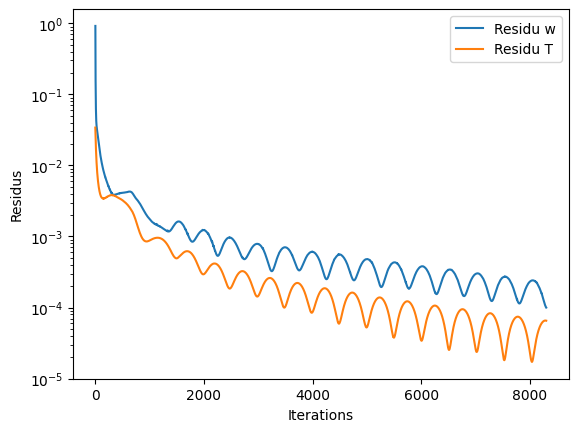

In [ ]:
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        res_w_plot = res_dict[Re][Ra]['res_w']
        res_T_plot = res_dict[Re][Ra]['res_T']
        plt.plot(res_w_plot, label = 'Residu w')
        plt.plot(res_T_plot, label = 'Residu T')
        plt.legend()
        plt.yscale('log')
        plt.xlabel('Iterations')
        plt.ylabel('Residus')
        plt.show()

In [12]:
def get_average_nusselt(T, dx):
    """
    Calcule le nombre de Nusselt moyen sur la paroi chaude (gauche) 
    et sur la paroi froide (droite).
    """
    # 1. Paroi chaude (x=0, i=0) : T=1.0
    # Le gradient est approx (T[i=1] - T[i=0]) / dx
    # Nu_hot = -dT/dx = (T[i=0] - T[i=1]) / dx
    nu_hot_local = (T[:, 0] - T[:, 1]) / dx
    nu_hot_avg = np.mean(nu_hot_local)
    
    # 2. Paroi froide (x=Lx, i=Nx-1) : T=0.0
    # Le gradient est approx (T[i=Nx-1] - T[i=Nx-2]) / dx
    # Nu_cold = -dT/dx = (T[i=Nx-2] - T[i=Nx-1]) / dx
    nu_cold_local = (T[:, -2] - T[:, -1]) / dx
    nu_cold_avg = np.mean(nu_cold_local)
    
    return nu_hot_avg, nu_cold_avg

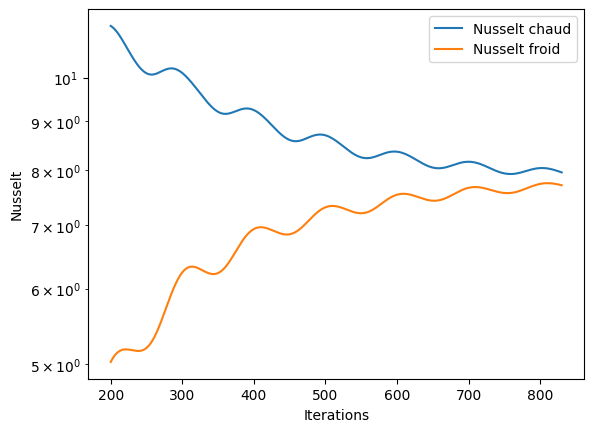

In [14]:
kmin = 200
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        Nu_hot_plot = []
        Nu_cold_plot = []
        for k in range(len(res_dict[Re][Ra]['T'])):
            if k >= kmin:
                Nu_hot_plot.append(get_average_nusselt(res_dict[Re][Ra]['T'][k], dx)[0])
                Nu_cold_plot.append(get_average_nusselt(res_dict[Re][Ra]['T'][k], dx)[1])
        plt.plot(np.arange(len(Nu_hot_plot))+200, Nu_hot_plot, label = 'Nusselt chaud')
        plt.plot(np.arange(len(Nu_hot_plot))+200, Nu_cold_plot, label = 'Nusselt froid')
        plt.legend()
        plt.xlabel('Iterations')
        plt.ylabel('Nusselt')
        plt.yscale('log')
        plt.show()

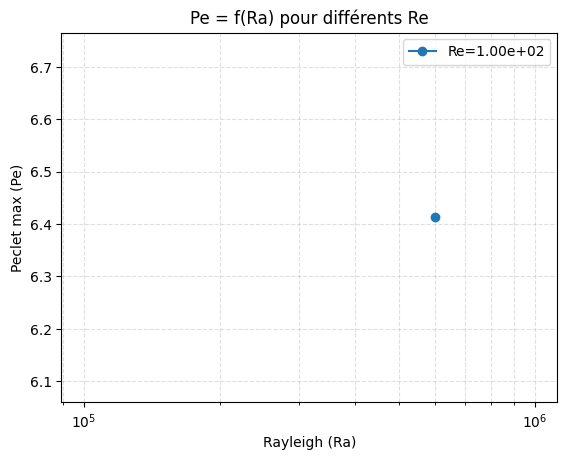

In [4]:
plt.figure()
for i, Re in enumerate(Re_list):
    plt.plot(res_dict[Re].keys(), [np.max(res_dict[Re][k]['Pe']) for k in res_dict[Re].keys()], marker="o", label=f"Re={Re:.2e}")

plt.xscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Peclet max (Pe)")
plt.title("Pe = f(Ra) pour différents Re")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


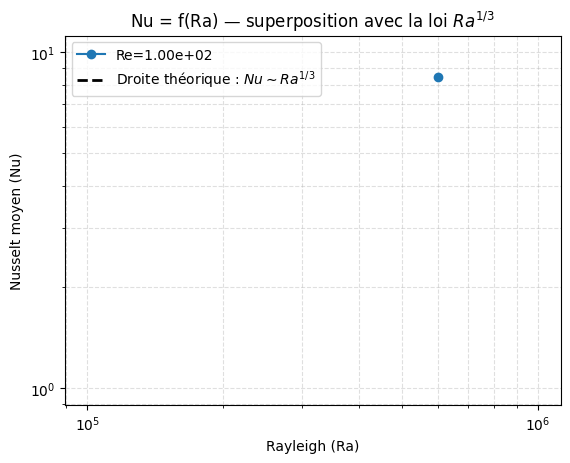

In [5]:
plt.figure()

# --- Courbes numériques ---
for i, Re in enumerate(Re_list):
    plt.plot(res_dict[Re].keys(), [res_dict[Re][k]['Nu'] for k in res_dict[Re].keys()], marker="o", label=f"Re={Re:.2e}")

# --- Choix du Re de référence (ex: Re = 100) ---
Re_ref = np.min(list(res_dict.keys()))

# --- Droite théorique : pente 1/4 ---
Ra_th = np.array(Ra_list, dtype=float)

Ra0 = Ra_th[0]
Nu0 = res_dict[Re_ref][Ra0]['Nu']

C = Nu0 / (Ra0**(1/3))
Nu_th = C * Ra_th**(1/3)

plt.plot(
    Ra_th,
    Nu_th,
    "k--",
    linewidth=2,
    label=r"Droite théorique : $Nu \sim Ra^{1/3}$"
)

# --- Mise en forme ---
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Rayleigh (Ra)")
plt.ylabel("Nusselt moyen (Nu)")
plt.title("Nu = f(Ra) — superposition avec la loi $Ra^{1/3}$")
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.legend()
plt.show()


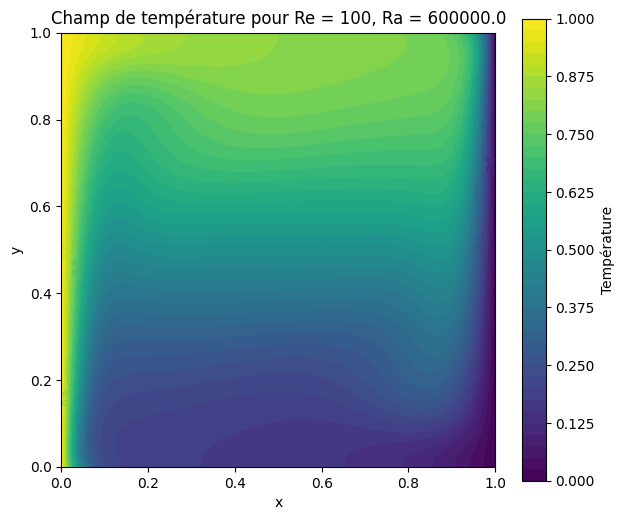

In [22]:
# 1. Préparation de la grille
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Sélection d'une itération (ex: la dernière enregistrée)
for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        T_plot = res_dict[Re][Ra]['T'][-1]
        Re_plot = Re_list[i]
        Ra_plot = Ra_list[j]

        plt.figure(figsize=(7, 6))
        levels = 40

        cf = plt.contourf(X, Y, T_plot, levels=levels)   # champ coloré
        cs = plt.contour(X, Y, T_plot, levels=11, linewidths=0.8)  # isothermes
        plt.clabel(cs, inline=True, fontsize=8)

        plt.colorbar(cf, label="Température")
        plt.title("Champ de température pour Re = " + str(Re_plot) + ", Ra = " + str(Ra_plot))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, Lx)
        plt.ylim(0, Ly)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()


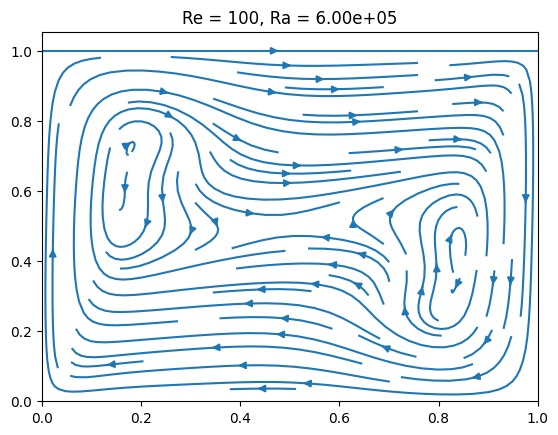

In [7]:
x, y = np.linspace(0,1,nx), np.linspace(0,1,ny)
X,Y = np.meshgrid(x,y)

for i, Re in enumerate(Re_list):
    for j, Ra in enumerate(Ra_list):
        u_plot, v_plot = res_dict[Re][Ra]['u'][-1], res_dict[Re][Ra]['v'][-1]
        plt.streamplot(X,Y,u_plot,v_plot)
        plt.title(f'Re = {Re:.0f}, Ra = {Ra:.2e}')
        plt.show()